In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("intern_public_dataset_2022/df_train_20220802.csv", low_memory=False)
df_rt = pd.read_csv("intern_public_dataset_2022/df_rt_20220802.csv", low_memory=False)
df_test_unlabeled = pd.read_csv("intern_public_dataset_2022/df_test_unlabeled_20220802.csv", low_memory=False)
df["request_time"] = pd.to_datetime(df["request_time"])
df_test_unlabeled["request_time"] = pd.to_datetime(df_test_unlabeled["request_time"])
df_rt["request_time"] = pd.to_datetime(df_rt["request_time"])
df

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,Windows,0,0,3.0,0,0,0,aichi,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,iOS,1,1,NaN,1,1,1,osaka,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,iOS,1,2,NaN,1,1,2,osaka,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,Windows,2,3,NaN,2,2,3,tokyo,...,NaN,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,Android,3,4,NaN,3,3,4,tokyo,...,NaN,0,0,-1,-1,NaN,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,Android,158132,979,NaN,8,8,118,miyazaki,...,NaN,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,Android,164623,225,3.0,7,7,35,tokyo,...,NaN,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,iOS,3054,2,NaN,2,2,708,kagoshima,...,NaN,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,Android,53986,6,1.0,17,17,491,osaka,...,NaN,1,0,5,-1,NaN,NaN,0,0,5


                  q_recency  sponsor_id  click_flg
0            (145.0, 965.0]           0          0
1             (-1.001, 3.0]           1          0
2             (-1.001, 3.0]           1          0
3               (3.0, 11.0]           2          0
4             (-1.001, 3.0]           3          0
...                     ...         ...        ...
5038562       (58.0, 145.0]           8          0
5038563  (21057.0, 86400.0]           7          0
5038564      (145.0, 965.0]           2          0
5038565         (3.0, 11.0]          17          0
5038566  (21057.0, 86400.0]           8          0

[5038567 rows x 3 columns]
________________________________________
q_recency           sponsor_id
(-1.001, 3.0]       0              76587
                    1             263804
                    2              77993
                    3             130814
                    4              65875
                                   ...  
(21057.0, 86400.0]  15             19842
 

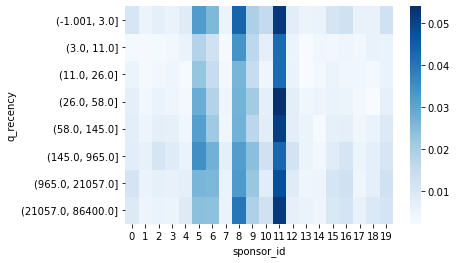

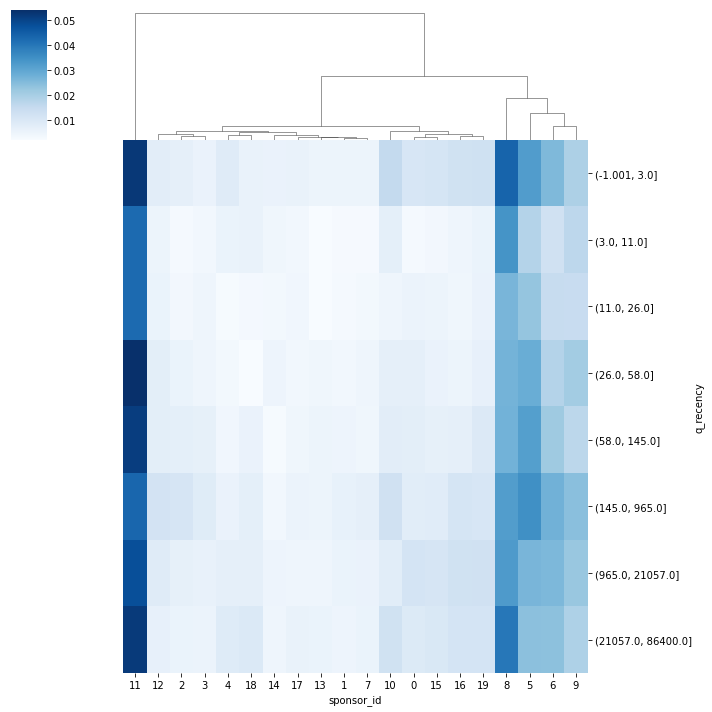

In [15]:
z = pd.DataFrame({"q_recency": pd.qcut(df["sponsor_recency"], 10, duplicates="drop"), "sponsor_id": df["sponsor_id"], "click_flg": df["click_flg"]})
print(z)
g = z.groupby(["q_recency","sponsor_id"])["click_flg"]
print('________________________________________')
print(g.size())
print('________________________________________')

print(g.value_counts()) #对于不同sponsor点击了和没点击分别的个数
print(g.sum())          #点击了的个数
rec_bin_ctr = (g.sum() / g.size()).unstack()

print(rec_bin_ctr)
# heatmap
sns.heatmap(rec_bin_ctr, cmap="Blues")
# heatmapで列のパターンをもとにクラスタリングして表示
sns.clustermap(rec_bin_ctr, cmap="Blues", row_cluster=False, col_cluster=True)

In [38]:
df.head()

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,Windows,0,0,3.0,0,0,0,aichi,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,iOS,1,1,NaN,1,1,1,osaka,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,iOS,1,2,NaN,1,1,2,osaka,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,Windows,2,3,NaN,2,2,3,tokyo,...,NaN,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,Android,3,4,NaN,3,3,4,tokyo,...,NaN,0,0,-1,-1,NaN,NaN,0,0,3


In [21]:
df.tail()

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
5038562,5038562,2022-07-26 14:59:52+00:00,Android,158132,979,NaN,8,8,118,miyazaki,...,NaN,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,Android,164623,225,3.0,7,7,35,tokyo,...,NaN,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,iOS,3054,2,NaN,2,2,708,kagoshima,...,NaN,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,Android,53986,6,1.0,17,17,491,osaka,...,NaN,1,0,5,-1,NaN,NaN,0,0,5
5038566,5038566,2022-07-26 14:59:59+00:00,Android,80017,979,NaN,8,8,279,tokyo,...,0.445011,5,1,23135,26470,NaN,NaN,0,0,11


In [7]:
f = pd.DataFrame({"q_sponsor_recency": pd.qcut(df["sponsor_inview_recency"], 10, duplicates="drop"), "sponsor_id": df["sponsor_id"], "click_flg": df["click_flg"]})
print(f)
# g = z.groupby(["q_recency","sponsor_id"])["click_flg"]
# print('________________________________________')
# print(g.size())
# print('________________________________________')

# print(g.value_counts()) #对于不同sponsor点击了和没点击分别的个数
# print(g.sum())          #点击了的个数
# rec_bin_ctr = (g.sum() / g.size()).unstack()

# print(rec_bin_ctr)
# # heatmap
# sns.heatmap(rec_bin_ctr, cmap="Blues")
# # heatmapで列のパターンをもとにクラスタリングして表示
# sns.clustermap(rec_bin_ctr, cmap="Blues", row_cluster=False, col_cluster=True)

          q_sponsor_recency  sponsor_id  click_flg
0          (280.0, 16518.0]           0          0
1            (-1.001, 31.0]           1          0
2            (-1.001, 31.0]           1          0
3            (-1.001, 31.0]           2          0
4            (-1.001, 31.0]           3          0
...                     ...         ...        ...
5038562    (280.0, 16518.0]           8          0
5038563      (-1.001, 31.0]           7          0
5038564    (280.0, 16518.0]           2          0
5038565      (-1.001, 31.0]          17          0
5038566  (16518.0, 86400.0]           8          0

[5038567 rows x 3 columns]


In [12]:
f['q_sponsor_recency'].value_counts()

(-1.001, 31.0]        3527019
(31.0, 280.0]          504405
(16518.0, 86400.0]     503856
(280.0, 16518.0]       503287
Name: q_sponsor_recency, dtype: int64

In [2]:
dic_osid = []
dic_region= []
encode_cols = ['os_id','region']
for c in encode_cols:
    if c == 'os_id':
        env,obj = pd.factorize(df[c],sort=True)
        df[c] = env
        dic_osid = obj
    else:
        env,obj = pd.factorize(df[c],sort=True)
        df[c] = env
        dic_region = obj
print(dic_osid)
print(dic_region)
df

Index(['Android', 'Mac', 'Windows', 'iOS'], dtype='object')
Index(['aichi', 'akita', 'aomori', 'chiba', 'ehime', 'fukui', 'fukuoka',
       'fukushima', 'gifu', 'gumma', 'hiroshima', 'hokkaido', 'hyogo',
       'ibaraki', 'ishikawa', 'iwate', 'kagawa', 'kagoshima', 'kanagawa',
       'kochi', 'kumamoto', 'kyoto', 'mie', 'miyagi', 'miyazaki', 'nagano',
       'nagasaki', 'nara', 'niigata', 'oita', 'okayama', 'okinawa', 'osaka',
       'saga', 'saitama', 'shiga', 'shimane', 'shizuoka', 'tochigi',
       'tokushima', 'tokyo', 'tottori', 'toyama', 'wakayama', 'yamagata',
       'yamaguchi', 'yamanashi'],
      dtype='object')


,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,2,0,0,3.0,0,0,0,0,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,3,1,1,NaN,1,1,1,32,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,3,1,2,NaN,1,1,2,32,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,2,2,3,NaN,2,2,3,40,...,NaN,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,0,3,4,NaN,3,3,4,40,...,NaN,0,0,-1,-1,NaN,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,0,158132,979,NaN,8,8,118,24,...,NaN,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,0,164623,225,3.0,7,7,35,40,...,NaN,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,3,3054,2,NaN,2,2,708,17,...,NaN,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,0,53986,6,1.0,17,17,491,32,...,NaN,1,0,5,-1,NaN,NaN,0,0,5


In [3]:
df['n_slot_position'].value_counts()

1.0     743701
2.0     687951
3.0     585619
4.0     325586
5.0      19312
6.0      10807
7.0       2253
8.0       1755
9.0        687
10.0       478
11.0       252
12.0       158
Name: n_slot_position, dtype: int64

In [4]:
#选出包含NaN的所有列
nanlst = df.columns[df.isna().any()].tolist()
nanlst

['n_slot_position', 'ref', 'prob_man', 'click_time', 'cv_time']

In [42]:
df.columns

Index(['req_id', 'request_time', 'os_id', 'ssp_uid', 'slot_id',
       'n_slot_position', 'sponsor_id', 'campaign_id', 'creative_id', 'region',
       'ref', 'prob_man', 'sponsor_fq', 'sponsor_inview_fq', 'sponsor_recency',
       'sponsor_inview_recency', 'click_time', 'cv_time', 'click_flg',
       'cv_flg', 'site_id'],
      dtype='object')

In [3]:
#选出包含NaN的所有行
selected_rows = df[df.isnull().any(axis=1)]
selected_rows

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,2,0,0,3.0,0,0,0,0,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,3,1,1,NaN,1,1,1,32,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,3,1,2,NaN,1,1,2,32,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,2,2,3,NaN,2,2,3,40,...,NaN,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,0,3,4,NaN,3,3,4,40,...,NaN,0,0,-1,-1,NaN,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,0,158132,979,NaN,8,8,118,24,...,NaN,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,0,164623,225,3.0,7,7,35,40,...,NaN,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,3,3054,2,NaN,2,2,708,17,...,NaN,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,0,53986,6,1.0,17,17,491,32,...,NaN,1,0,5,-1,NaN,NaN,0,0,5


In [3]:
df = df.fillna(df.mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [4]:
df

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,2,0,0,3.000000,0,0,0,0,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,3,1,1,2.264248,1,1,1,32,...,0.525834,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,3,1,2,2.264248,1,1,2,32,...,0.525834,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,2,2,3,2.264248,2,2,3,40,...,0.525834,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,0,3,4,2.264248,3,3,4,40,...,0.525834,0,0,-1,-1,NaN,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,0,158132,979,2.264248,8,8,118,24,...,0.525834,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,0,164623,225,3.000000,7,7,35,40,...,0.525834,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,3,3054,2,2.264248,2,2,708,17,...,0.525834,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,0,53986,6,1.000000,17,17,491,32,...,0.525834,1,0,5,-1,NaN,NaN,0,0,5


In [43]:
#选出包含NaN的所有列
nanlst = df.columns[df.isna().any()].tolist()
nanlst

['click_time', 'cv_time']

In [5]:
df.dropna(axis=1,how='any',inplace=True)

In [6]:
df

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,ref,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,2,0,0,3.000000,0,0,0,0,0.000000,0.985029,6,5,370,410,0,0,0
1,1,2022-06-14 15:00:07+00:00,3,1,1,2.264248,1,1,1,32,124154.795406,0.525834,0,0,-1,-1,0,0,1
2,2,2022-06-14 15:00:07+00:00,3,1,2,2.264248,1,1,2,32,124154.795406,0.525834,0,0,-1,-1,0,0,1
3,3,2022-06-14 15:00:08+00:00,2,2,3,2.264248,2,2,3,40,2.000000,0.525834,5,2,5,2,0,0,2
4,4,2022-06-14 15:00:09+00:00,0,3,4,2.264248,3,3,4,40,3.000000,0.525834,0,0,-1,-1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,0,158132,979,2.264248,8,8,118,24,124154.795406,0.525834,8,1,145,15356,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,0,164623,225,3.000000,7,7,35,40,124154.795406,0.525834,2,0,37590,-1,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,3,3054,2,2.264248,2,2,708,17,1834.000000,0.525834,3,1,219,308,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,0,53986,6,1.000000,17,17,491,32,5.000000,0.525834,1,0,5,-1,0,0,5


In [6]:
df['request_time']=pd.to_datetime(df['request_time'])
new = pd.DataFrame((df.groupby([(df['request_time'].dt.month),(df['request_time'].dt.day)])["click_flg"].sum())/(df.groupby([(df['request_time'].dt.month),(df['request_time'].dt.day)])["click_flg"].size()))


In [95]:
len(df.index)

5038567

In [ ]:
# for i in range(len(df.index)):
#     df.iloc[i,19] = new.loc[df['request_time'].dt.month[i],df['request_time'].dt.day[i]]['click_flg']
    
# df

In [63]:
new.loc[6,14]['click_flg']

0.012749250044115052

In [7]:
d_f = df
d_f.columns

Index(['req_id', 'request_time', 'os_id', 'ssp_uid', 'slot_id',
       'n_slot_position', 'sponsor_id', 'campaign_id', 'creative_id', 'region',
       'ref', 'prob_man', 'sponsor_fq', 'sponsor_inview_fq', 'sponsor_recency',
       'sponsor_inview_recency', 'click_flg', 'cv_flg', 'site_id'],
      dtype='object')

In [8]:
d_f

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,ref,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,2,0,0,3.000000,0,0,0,0,0.000000,0.985029,6,5,370,410,0,0,0
1,1,2022-06-14 15:00:07+00:00,3,1,1,2.264248,1,1,1,32,124154.795406,0.525834,0,0,-1,-1,0,0,1
2,2,2022-06-14 15:00:07+00:00,3,1,2,2.264248,1,1,2,32,124154.795406,0.525834,0,0,-1,-1,0,0,1
3,3,2022-06-14 15:00:08+00:00,2,2,3,2.264248,2,2,3,40,2.000000,0.525834,5,2,5,2,0,0,2
4,4,2022-06-14 15:00:09+00:00,0,3,4,2.264248,3,3,4,40,3.000000,0.525834,0,0,-1,-1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,0,158132,979,2.264248,8,8,118,24,124154.795406,0.525834,8,1,145,15356,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,0,164623,225,3.000000,7,7,35,40,124154.795406,0.525834,2,0,37590,-1,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,3,3054,2,2.264248,2,2,708,17,1834.000000,0.525834,3,1,219,308,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,0,53986,6,1.000000,17,17,491,32,5.000000,0.525834,1,0,5,-1,0,0,5


In [9]:
d_f = d_f.drop(['request_time'], axis=1)
d_f

,req_id,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,ref,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_flg,cv_flg,site_id
0,0,2,0,0,3.000000,0,0,0,0,0.000000,0.985029,6,5,370,410,0,0,0
1,1,3,1,1,2.264248,1,1,1,32,124154.795406,0.525834,0,0,-1,-1,0,0,1
2,2,3,1,2,2.264248,1,1,2,32,124154.795406,0.525834,0,0,-1,-1,0,0,1
3,3,2,2,3,2.264248,2,2,3,40,2.000000,0.525834,5,2,5,2,0,0,2
4,4,0,3,4,2.264248,3,3,4,40,3.000000,0.525834,0,0,-1,-1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,0,158132,979,2.264248,8,8,118,24,124154.795406,0.525834,8,1,145,15356,0,0,11
5038563,5038563,0,164623,225,3.000000,7,7,35,40,124154.795406,0.525834,2,0,37590,-1,0,0,31
5038564,5038564,3,3054,2,2.264248,2,2,708,17,1834.000000,0.525834,3,1,219,308,0,0,1
5038565,5038565,0,53986,6,1.000000,17,17,491,32,5.000000,0.525834,1,0,5,-1,0,0,5


In [18]:
d_f['sponsor_inview_recency'].value_counts()

-1        3252326
 5          11357
 4          11165
 6          10812
 8          10793
           ...   
 45775          1
 75637          1
 43110          1
 52571          1
 29984          1
Name: sponsor_inview_recency, Length: 86292, dtype: int64

In [14]:
len(d_f.columns)

18

In [10]:
df_corr = d_f.corr()
df_corr

,req_id,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,ref,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_flg,cv_flg,site_id
req_id,1.000000,-0.022897,0.189967,0.101608,-0.013605,0.093054,0.093054,0.522848,-0.011167,0.336617,0.000114,0.025570,0.019235,-0.005278,0.009019,-0.000259,0.000200,0.068835
os_id,-0.022897,1.000000,-0.184583,-0.316066,0.035219,-0.061244,-0.061244,0.006967,-0.009048,0.027699,0.008280,-0.046943,-0.043299,0.010479,-0.036052,-0.084369,-0.003793,-0.272466
ssp_uid,0.189967,-0.184583,1.000000,0.138846,-0.010427,0.037929,0.037929,0.087355,-0.007659,0.081609,0.001315,0.033881,0.019789,-0.020915,-0.006671,0.019523,0.001825,0.124632
slot_id,0.101608,-0.316066,0.138846,1.000000,-0.077740,0.047549,0.047549,0.033269,-0.006858,0.082021,0.002400,0.079018,0.131371,-0.020981,0.016487,0.060576,0.002754,0.698300
n_slot_position,-0.013605,0.035219,-0.010427,-0.077740,1.000000,0.084865,0.084865,0.010046,0.001010,-0.019521,0.000295,-0.117987,-0.088023,0.015716,-0.036125,-0.030824,-0.001342,-0.067367
sponsor_id,0.093054,-0.061244,0.037929,0.047549,0.084865,1.000000,1.000000,0.129446,0.002590,0.059602,0.000061,-0.077563,-0.049911,-0.012235,-0.033827,0.011412,0.000020,0.040206
campaign_id,0.093054,-0.061244,0.037929,0.047549,0.084865,1.000000,1.000000,0.129446,0.002590,0.059602,0.000061,-0.077563,-0.049911,-0.012235,-0.033827,0.011412,0.000020,0.040206
creative_id,0.522848,0.006967,0.087355,0.033269,0.010046,0.129446,0.129446,1.000000,-0.004892,0.166898,-0.000710,0.001080,-0.007176,-0.005347,-0.003524,0.014294,0.000494,-0.007409
region,-0.011167,-0.009048,-0.007659,-0.006858,0.001010,0.002590,0.002590,-0.004892,1.000000,0.005464,-0.000633,-0.026727,-0.030976,-0.002575,-0.011774,0.000748,-0.000402,-0.000863
ref,0.336617,0.027699,0.081609,0.082021,-0.019521,0.059602,0.059602,0.166898,0.005464,1.000000,0.003986,0.054118,0.045677,-0.030432,-0.017745,-0.002836,0.000413,0.109110


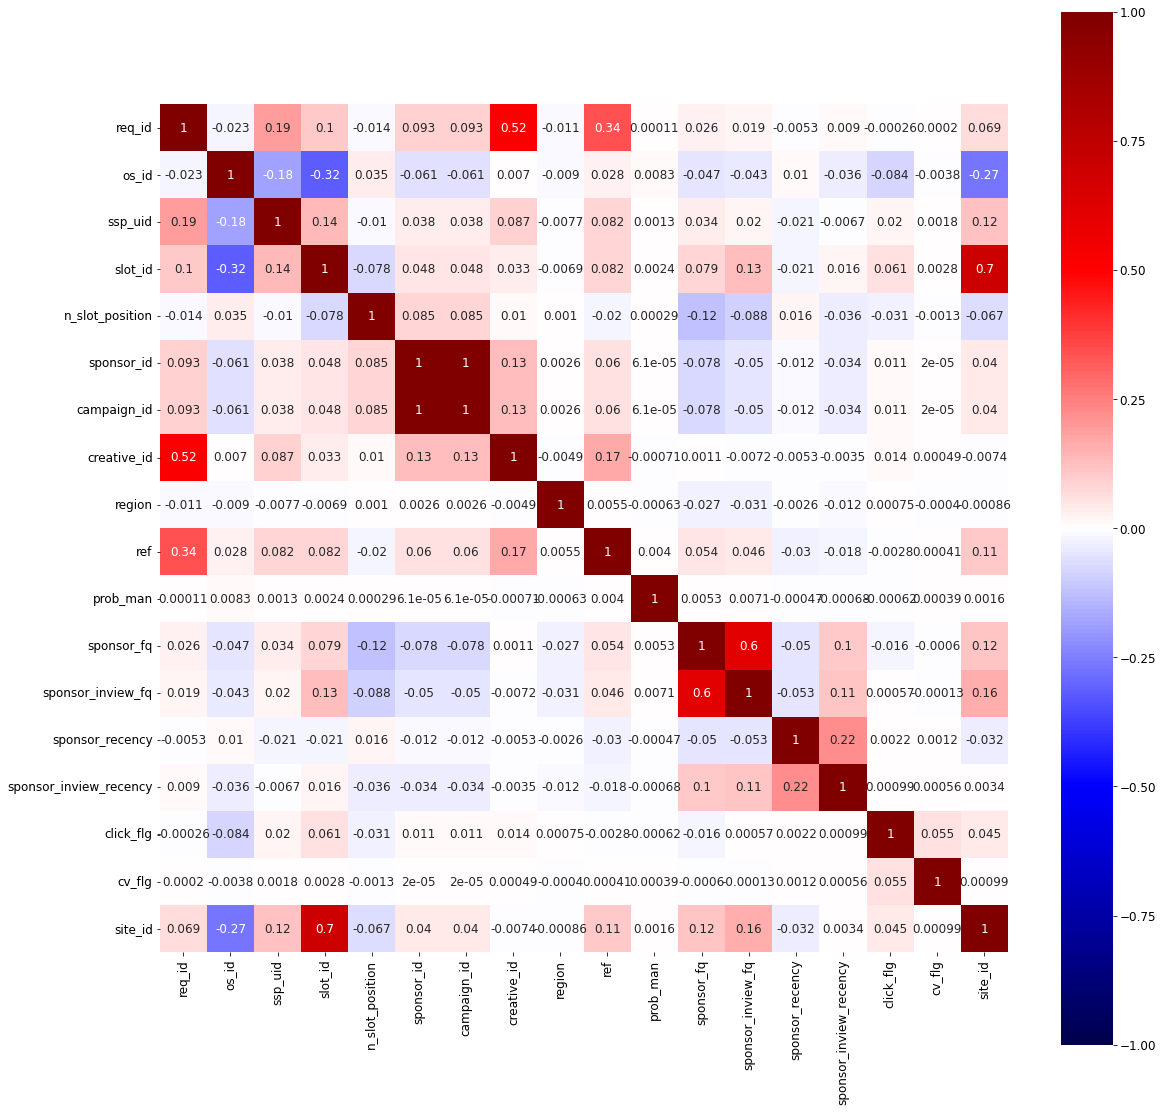

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 12
plt.figure(figsize=(19, 19))  # この段階で画像のサイズを指定する
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, df_corr.shape[0]])
plt.show()

In [11]:
dfs = d_f.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,req_id,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,ref,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_flg,cv_flg,site_id
0,-1.732050,0.222290,-1.489521,-0.593529,0.948421,-1.177164,-1.177164,-1.005082,-1.651087,-1.048283e+00,3.809395e+00,0.228935,1.426067,-0.337136,-0.304544,-0.099389,-0.005456,-0.532870
1,-1.732050,0.917383,-1.489503,-0.588348,0.000000,-1.003160,-1.003160,-1.002224,0.324358,-4.914681e-16,1.842040e-15,-0.698591,-0.424263,-0.358988,-0.328985,-0.099389,-0.005456,-0.509925
2,-1.732049,0.917383,-1.489503,-0.583167,0.000000,-1.003160,-1.003160,-0.999367,0.324358,-4.914681e-16,1.842040e-15,-0.698591,-0.424263,-0.358988,-0.328985,-0.099389,-0.005456,-0.509925
3,-1.732048,0.222290,-1.489486,-0.577986,0.000000,-0.829156,-0.829156,-0.996509,0.818219,-1.048266e+00,1.842040e-15,0.074347,0.315869,-0.358635,-0.328806,-0.099389,-0.005456,-0.486980
4,-1.732048,-1.167896,-1.489468,-0.572805,0.000000,-0.655153,-0.655153,-0.993651,0.818219,-1.048258e+00,1.842040e-15,-0.698591,-0.424263,-0.358988,-0.328985,-0.099389,-0.005456,-0.464035


In [ ]:
# plt.rcParams['font.size'] = 8  # 横軸や縦軸の名前の文字などのフォントのサイズ
# pd.plotting.scatter_matrix(dataset, c='blue', figsize=(10, 10)) # ここで画像サイズを指定
# plt.show()

In [12]:
from sklearn.decomposition import PCA
pca = PCA()  # PCA を行ったり PCA の結果を格納したりするための変数を、pca として宣言
pca.fit(dfs)  # PCA を実行

PCA()

In [13]:
loadings = pd.DataFrame(pca.components_.T, index=d_f.columns)
loadings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
req_id,0.316469,-0.041344,-0.550891,-0.125901,0.051573,0.004904,-0.007439,-0.001405,-0.002370,-0.005661,-0.014292,0.140755,-0.000508,-0.012529,0.743225,-0.046365,-0.036337,-4.363059e-17
os_id,-0.258436,-0.179194,-0.250323,0.200459,-0.100628,-0.073327,0.108856,-0.003260,0.371496,0.013187,-0.060879,-0.163319,0.268269,0.725611,0.000580,-0.037440,0.049463,3.740688e-17
ssp_uid,0.224429,0.081628,-0.096844,-0.187255,0.022441,0.033255,-0.203120,0.090573,-0.654145,0.085090,0.305853,-0.371923,0.182811,0.364786,-0.115369,0.025211,0.001388,3.248626e-16
slot_id,0.392127,0.316060,0.233663,-0.252441,0.017454,-0.113618,0.051134,0.010549,0.234551,0.043119,-0.050906,0.099710,0.056212,0.179521,0.000422,0.003342,0.712231,2.037909e-16
n_slot_position,-0.024129,-0.195161,0.034716,-0.055470,0.007474,-0.177469,-0.121516,0.158218,-0.159328,0.722312,-0.578133,-0.001084,-0.049576,0.007457,0.008063,-0.038570,0.016506,6.237934e-17
sponsor_id,0.406690,-0.453614,0.221248,0.268853,0.004776,0.011823,0.012619,-0.014634,0.014021,-0.049296,0.048514,-0.033331,0.010198,0.020537,0.017422,-0.012042,0.001740,-7.071068e-01
campaign_id,0.406690,-0.453614,0.221248,0.268853,0.004776,0.011823,0.012619,-0.014634,0.014021,-0.049296,0.048514,-0.033331,0.010198,0.020537,0.017422,-0.012042,0.001740,7.071068e-01
creative_id,0.260612,-0.115776,-0.502230,-0.071098,0.059162,0.055259,-0.016008,-0.007682,-0.018857,-0.045097,-0.079370,0.521611,0.065353,0.028197,-0.605234,0.041390,-0.025767,-9.075681e-17
region,-0.008214,-0.023273,0.023275,-0.064346,-0.023912,-0.010307,0.658425,-0.675103,-0.272969,0.159743,-0.031444,0.032385,0.026699,0.042335,0.010512,0.003971,0.006717,-1.069305e-16
ref,0.229137,0.014085,-0.374631,-0.052353,-0.077305,-0.064982,0.128814,-0.048619,0.288795,0.045995,-0.064183,-0.697758,-0.213927,-0.299381,-0.245016,0.036310,0.042472,-9.797137e-17


['sponsor_id',
 'sponsor_inview_fq',
 'site_id',
 'sponsor_fq',
 'sponsor_recency',
 'cv_flg',
 'prob_man',
 'os_id',
 'n_slot_position',
 'creative_id']

In [15]:
d_f.columns

Index(['req_id', 'os_id', 'ssp_uid', 'slot_id', 'n_slot_position',
       'sponsor_id', 'campaign_id', 'creative_id', 'region', 'ref', 'prob_man',
       'sponsor_fq', 'sponsor_inview_fq', 'sponsor_recency',
       'sponsor_inview_recency', 'click_flg', 'cv_flg', 'site_id'],
      dtype='object')

In [16]:
score = pd.DataFrame(pca.transform(dfs), index=d_f.index)
score

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.616299,1.166210,1.018271,1.257581,-0.734188,-0.162510,1.488023,3.913092,0.053823,0.284694,-0.900905,0.627947,-0.122070,-0.535543,-0.202035,0.822297,-0.017859,1.970140e-16
1,-2.742316,0.003161,0.768228,-0.216616,-0.675690,-0.141951,0.542031,-0.298168,1.034423,-0.045491,-0.315700,-0.310622,-0.323938,-0.073670,-0.507103,0.222751,0.039364,-9.400021e-16
2,-2.739539,0.004468,0.768003,-0.218127,-0.675430,-0.142382,0.542251,-0.298136,1.035584,-0.045397,-0.316191,-0.308614,-0.323460,-0.072659,-0.508830,0.222886,0.042980,-9.402614e-16
3,-2.472248,0.512382,1.309423,0.575323,-0.667025,0.022068,0.646197,-0.605266,0.213779,0.085737,-0.328791,0.565445,-0.089017,-0.312273,-0.236053,0.189213,-0.014261,-6.497110e-16
4,-2.138916,0.053899,1.858813,-0.438672,-0.393433,0.074584,0.517757,-0.583792,-0.152114,-0.072903,-0.107641,0.761224,-0.633896,-1.225269,-0.240994,0.253173,-0.124782,-7.608452e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,2.860681,1.704444,0.542454,-1.208990,0.372699,-0.406147,-0.307716,0.258364,-0.363048,0.294633,0.374265,0.072377,-0.425295,0.546001,1.517479,-0.425192,3.310272,1.199574e-15
5038563,1.044095,-0.025154,-0.031172,-1.418171,1.356140,-0.400305,0.139424,-0.241362,-1.290488,1.010665,0.047245,-0.712214,1.181951,-0.707166,1.663180,-0.083719,0.195036,1.042322e-15
5038564,-1.095695,-0.209168,-1.784124,-0.143679,-0.324308,0.094986,-0.273613,0.343667,0.835959,-0.295680,-0.461306,1.900249,0.110679,0.191643,1.087720,0.038780,-0.164937,-8.720287e-16
5038565,1.598312,-1.977073,0.166545,0.350266,-0.102349,0.550569,0.210350,-0.511012,-0.355313,-1.555309,1.209228,1.443690,-0.228921,-0.814855,1.438573,0.065192,-0.322218,3.237825e-16


In [17]:
# 寄与率を算出
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratios

,0
0,1.274212e-01
1,1.163112e-01
2,8.827599e-02
3,8.094550e-02
4,6.760588e-02
5,5.859410e-02
6,5.561959e-02
7,5.557763e-02
8,5.423119e-02
9,5.362315e-02


In [18]:
# 累積寄与率を算出（.cusum()で累積和を計算 .sum()では総和しか得られない）
cumulative_contribution_ratios = contribution_ratios.cumsum()
cumulative_contribution_ratios

,0
0,0.127421
1,0.243732
2,0.332008
3,0.412954
4,0.480560
5,0.539154
6,0.594774
7,0.650351
8,0.704582
9,0.758205


In [ ]:
cont_cumcont_ratios = pd.concat([contribution_ratios, cumulative_contribution_ratios], axis=1).T
cont_cumcont_ratios.index = ['contribution_ratio', 'cumulative_contribution_ratio']  # 行の名前を変更
# 寄与率を棒グラフで、累積寄与率を線で入れたプロット図を重ねて描画
x_axis = range(1, contribution_ratios.shape[0] + 1)  # 1 から成分数までの整数が x 軸の値
plt.rcParams['font.size'] = 18
plt.bar(x_axis, contribution_ratios.iloc[:, 0], align='center')  # 寄与率の棒グラフ
plt.plot(x_axis, cumulative_contribution_ratios.iloc[:, 0], 'r.-')  # 累積寄与率の線を入れたプロット図
plt.xlabel('Number of principal components')  # 横軸の名前
plt.ylabel('Contribution ratio(blue),\nCumulative contribution ratio(red)')  # 縦軸の名前。\n で改行しています
plt.show()

In [22]:
#选取因子
max_x = loadings.loc[loadings[1].idxmax()]
max_x.name

maxvari=[]
for i in range(len(loadings.columns)):
    max_x = loadings.loc[loadings[i].idxmax()]
    if max_x.name not in maxvari:
        maxvari.append(max_x.name)
maxvari = maxvari[:11]

x_train = pd.DataFrame(df, columns=maxvari).drop(['cv_flg'], axis=1)
x_train

,sponsor_id,sponsor_inview_fq,site_id,sponsor_fq,sponsor_recency,prob_man,os_id,n_slot_position,creative_id,req_id
0,0,5,0,6,370,0.985029,2,3.000000,0,0
1,1,0,1,0,-1,0.525834,3,2.264248,1,1
2,1,0,1,0,-1,0.525834,3,2.264248,2,2
3,2,2,2,5,5,0.525834,2,2.264248,3,3
4,3,0,3,0,-1,0.525834,0,2.264248,4,4
...,...,...,...,...,...,...,...,...,...,...
5038562,8,1,11,8,145,0.525834,0,2.264248,118,5038562
5038563,7,0,31,2,37590,0.525834,0,3.000000,35,5038563
5038564,2,1,1,3,219,0.525834,3,2.264248,708,5038564
5038565,17,0,5,1,5,0.525834,0,1.000000,491,5038565


In [23]:
y_train = pd.DataFrame(df,columns=['click_flg'])
y_train

,click_flg
0,0
1,0
2,0
3,0
4,0
...,...
5038562,0
5038563,0
5038564,0
5038565,0


In [24]:
x_train.to_csv('x_train.csv',index=False)

In [25]:
y_train.to_csv('y_train.csv',index=False)